In [ ]:
#hide
%load_ext autoreload
%autoreload 2

# Welcome to NumbaSOM

> A fast Self-Organizing Map Python library implemented in Numba.

This is a **fast and simple to use** SOM library. It utilizes online training (one data point at the time) rather than batch training. The implemented topologies are a simple 2D lattice or a torus.

## How to Install

The installation is available at PyPI. Simply type:

`pip install numbasom`

## How to use

A **Self-Organizing Map** is often used to show the underlying structure in data. To show how to use the library, we will train it on 200 random 3-dimensional vectors (so we can render them as colors):

In [ ]:
import numpy as np
from numbasom import SOM

#### Create 200 random colors

In [ ]:
data = np.random.random([200,3])

#### Initialize the library

We initalize a large map with 50 rows and 100 columns. The default topology is a 2D lattice. We can also train it on a torus by setting `is_torus=True`

In [ ]:
som = SOM(som_size=(50,100), is_torus=False)

#### Train the SOM

We will adapt the lattice by iterating 10.000 times through our data points. If we set `normalize=True`, data will be normalized before training. 

In [ ]:
lattice = som.train(data, num_iterations=10000, normalize=False)

SOM training took: 1.226620 seconds.


#### We can display a number of lattice cells to make sure they are 3-dimensional vectors

In [ ]:
lattice[1::6,1]

array([[0.05352045, 0.15896125, 0.7420259 ],
       [0.15439387, 0.37704456, 0.93526777],
       [0.08515633, 0.53175494, 0.91804874],
       [0.06335633, 0.49642414, 0.69104741],
       [0.06591933, 0.59309804, 0.49921794],
       [0.16320654, 0.72864344, 0.50206561],
       [0.15155032, 0.86532851, 0.5941866 ],
       [0.12491621, 0.80582096, 0.88880239],
       [0.08571474, 0.76112734, 0.9400243 ]])

The shape of the lattice should be (50, 100, 3)

In [ ]:
lattice.shape

(50, 100, 3)

#### Visualizing the lattice

Since our lattice is made of 3-dimensional vectors, we can represent it as a lattice of colors.

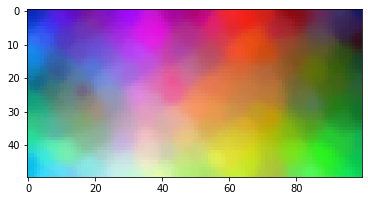

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(lattice)
plt.show()

#### Compute U-matrix

Since the most of the data will not be 3-dimensional, we can use the U-matrix (unified distance matrix by Alfred Ultsch) to visualise the map and the clusters emerging on it. 

In [ ]:
from numbasom import u_matrix

um = u_matrix(lattice)

In [ ]:
um.shape

(50, 100)

#### Plot U-matrix

The library contains a function `plot_u_matrix` that can help visualise it.

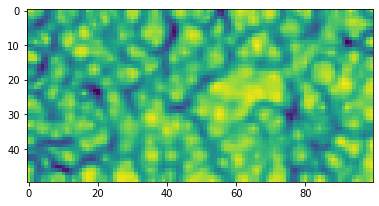

In [ ]:
from numbasom import plot_u_matrix

plot_u_matrix(um, fig_size=(6.2,6.2))

#### Project on the lattice

In [ ]:
from numbasom import project_on_lattice

Let's project a couple of predefined color on the trained lattice and see in which cells they will end up:

In [ ]:
colors = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.],[1.,1.,0.],[0.,0.,0.],[1.,1.,1.]])
color_labels = ['red', 'green', 'blue', 'yellow', 'black', 'white']

In [ ]:
projection = project_on_lattice(colors, lattice, additional_list=color_labels)

Projecting on SOM took: 0.207900 seconds.


In [ ]:
for p in projection:
    if projection[p]:
        print (p, projection[p][0])

(2, 0) blue
(3, 65) red
(10, 99) black
(42, 65) yellow
(43, 89) green
(46, 34) white


#### Find every cell's closest vector in the data

We can again use the colors example:

In [ ]:
from numbasom import lattice_closest_vectors

In [ ]:
closest = lattice_closest_vectors(colors, lattice, additional_list=color_labels)

Finding closest data points took: 0.070732 seconds.


We can ask now to which value in `color_labels` are out lattice cells closest to:

In [ ]:
closest[(1,1)]

['blue']

In [ ]:
closest[(20,30)]

['white']